In [1]:
pip install -U sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [245]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# import openpyxl
from statistics import mean, median
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from numpy import asarray
from math import sqrt, log
# import re
# import heapq
from itertools import combinations
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer

In [3]:
dfrev = pd.read_excel(r'C:\Users\eywy0\Downloads\RestaurantReviews.xlsx','Reviews')
dfrev.head(1)

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
0,Connie Neal,Lao Sze Chuan,1,Really disappointed for the dishes…. Not athle...,2022-08-10 00:00:00,1942.0,Single,No,NaN,234.0,161.0,Medium,Car Owner,No


In [4]:
dfres = pd.read_excel(r'C:\Users\eywy0\Downloads\RestaurantReviews.xlsx','Restaurants')
dfres.head(1)

,Restaurant Name,Cuisine,Latitude,Longitude,Average Cost,Open After 8pm?,Brief Description
0,Tapas Barcelona,Spanish,42.046736,-87.679043,20,Yes,"Festive, warm space known for Spanish small pl..."


In [5]:
# Looking into Misssing Values

missingrev,missingres={},{}
for col in dfrev.columns:
    if dfrev[col].isnull().values.any(): missingrev[col]=dfrev[col].isnull().sum()
    
for col in dfres.columns:
    if dfres[col].isnull().values.any(): missingres[col]=dfres[col].isnull().sum()
    
missingrev
# missingres

{'Review Text': 550,
 'Birth Year': 2,
 'Marital Status': 35,
 'Has Children?': 38,
 'Vegetarian?': 1350,
 'Weight (lb)': 97,
 'Height (in)': 54,
 'Average Amount Spent': 2,
 'Preferred Mode of Transport': 7,
 'Northwestern Student?': 1}

In [6]:
# Investigating in the data points with 'Vegetarian?' filled

print(dfrev[dfrev['Vegetarian?']=='Yes'].mean())
print(dfrev[dfrev['Vegetarian?']=='No'].mean())
print(dfrev[dfrev['Vegetarian?']!=dfrev['Vegetarian?']].mean())

Rating            4.137931
Birth Year     1986.241379
Weight (lb)     183.862069
Height (in)     173.827586
dtype: float64
Rating            3.138462
Birth Year     1979.630769
Weight (lb)     189.453125
Height (in)     175.437500
dtype: float64
Rating            3.774074
Birth Year     1978.267062
Vegetarian?            NaN
Weight (lb)     205.236842
Height (in)     172.018504
dtype: float64


In [159]:
# Dealing with Misssing Values

drops,skeeps,nkeeps=['Birth Year','Average Amount Spent','Preferred Mode of Transport','Northwestern Student?'], ['Marital Status','Has Children?','Vegetarian?'], ['Weight (lb)','Height (in)']
for keep in skeeps:
    dfrev[keep]=dfrev[keep].fillna('missing')
for keep in nkeeps:
    dfrev[keep]=dfrev[keep].fillna(0)
for drop in drops:
    dfrev=dfrev[dfrev[drop].notna()]
    
dfrev.head(1)

IndentationError: unexpected indent (1063677759.py, line 4)

Text(0, 0.5, 'Frequency')

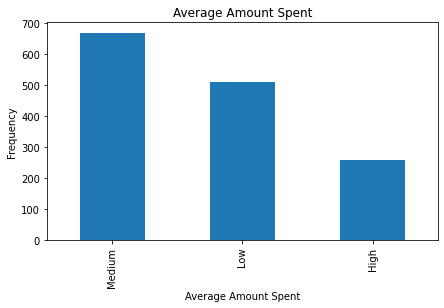

In [8]:
# Plot

ax = dfrev['Average Amount Spent'].value_counts().plot(kind='bar',
                                    figsize=(7,4),
                                    title='Average Amount Spent')
ax.set_xlabel('Average Amount Spent')
ax.set_ylabel("Frequency")

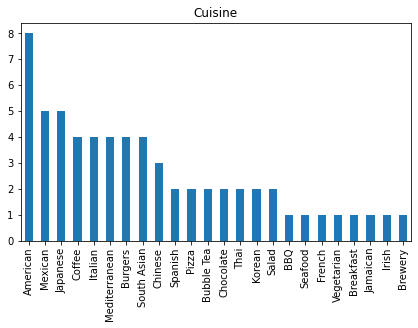

In [9]:
ax = dfres['Cuisine'].value_counts().plot(kind='bar',
                                    figsize=(7,4),
                                    title="Cuisine")

In [9]:
# encoder = OneHotEncoder(sparse=False)

catvar=['Marital Status','Has Children?','Average Amount Spent','Preferred Mode of Transport','Northwestern Student?','Vegetarian?']

newdfrev = pd.get_dummies(dfrev, columns = catvar)
newdfrev['Marital Status_Single']=newdfrev['Marital Status_Single']+newdfrev['Marital Status_SIngle']
newdfrev=newdfrev.drop('Marital Status_SIngle',axis=1)
newdfrev.head()

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Weight (lb),Height (in),Marital Status_Married,Marital Status_Single,...,Average Amount Spent_Low,Average Amount Spent_Medium,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Northwestern Student?_No,Northwestern Student?_Yes,Vegetarian?_No,Vegetarian?_Yes,Vegetarian?_missing
0,Connie Neal,Lao Sze Chuan,1,Really disappointed for the dishes…. Not athle...,2022-08-10 00:00:00,1942.0,234.0,161.0,0,1,...,0,1,1,0,0,1,0,0,0,1
1,Jacquelyn Rigatti,Barn Steakhouse,5,Excellent meal in a warm atmosphere! The space...,2022-11-22 00:00:00,1998.0,0.0,0.0,0,1,...,0,1,0,1,0,1,0,0,0,1
2,Jacquelyn Rigatti,Brothers K Coffeehouse,4,NaN,2022-08-18 00:00:00,1998.0,0.0,0.0,0,1,...,0,1,0,1,0,1,0,0,0,1
3,Jacquelyn Rigatti,Clarkes Off Campus,5,Best burger in Evanston,2022-10-30 00:00:00,1998.0,0.0,0.0,0,1,...,0,1,0,1,0,1,0,0,0,1
4,Jacquelyn Rigatti,Edzo's Burger Shop,5,Second best burger in Evanston,2022-11-28 00:00:00,1998.0,0.0,0.0,0,1,...,0,1,0,1,0,1,0,0,0,1


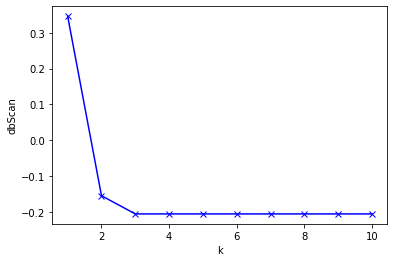

In [8]:
K = range(1,11)
catdf=newdfrev.copy()
catdf=catdf.drop(['Reviewer Name','Restaurant Name','Rating','Review Text','Date of Review','Weight (lb)','Height (in)'],axis=1)

# inertia = []
# for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(catdf)
#     inertia.append(kmeans.inertia_)

# silhouette=[]
# for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(catdf)
#     score=silhouette_score(catdf, kmeans.labels_)
#     silhouette.append(score)
    
db=[]
for k in K:
    dbscan=DBSCAN(eps=2/k)  
    dbscan.fit(catdf)
    score=silhouette_score(catdf, dbscan.labels_)
    db.append(score)

# Plot the elbow
plt.plot(K, db, 'bx-')
plt.xlabel('k')
plt.ylabel('dbScan')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(data_encoded.toarray())

dbscan=DBSCAN(eps=2)
dbscan.fit(catdf)

agg=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labelsagg = agg.fit_predict(data_encoded.toarray())

# dfrev['labels'] = labels
# sns.pairplot(dfrev, hue='labels')
# sns.pairplot(dfrev[dfrev['labels']==0], hue='labels')
# sns.pairplot(dfrev[dfrev['labels']==1], hue='labels',palette='OrRd')
# sns.pairplot(newdfrev, hue='labels')

newdfrev

NameError: name 'data_encoded' is not defined

In [ ]:
pd.set_option('display.max_columns', None)
newdfrev['labels'] = labels
newdfrev.groupby(['labels']).sum()

In [ ]:
newdfrev['labels'] = dbscan.labels_
newdfrev[newdfrev['labels']==1]

In [ ]:
newdfrev['labels'] = labelsagg
newdfrev.groupby(['labels']).sum()

In [ ]:
encoder = OrdinalEncoder()
oedfrev=dfrev.copy()
for col in catvar:
    oedfrev[col] = encoder.fit_transform(oedfrev[col].values.reshape(-1,1))
    

In [ ]:
# Popularity matching

ratings,rates={},[]
restaurants=set(dfrev.iloc[:,1])
for r in restaurants:
    ratings[r]=mean(dfrev['Rating'][dfrev['Restaurant Name']==r])
    rates.append(mean(dfrev['Rating'][dfrev['Restaurant Name']==r]))
    
MED=median(rates)
MU=mean(rates)
# 3.92
# 3.8004613223005332

pd.DataFrame(rates).plot.density()
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(rates, bins = [max(rates)*(i/100) for i in range(101)])
# plt.xlabel("transactionAmount")
# plt.ylabel("number of restaurant")
# plt.title("transactionAmount distribution")
# plt.show()

In [ ]:
dict(sorted(ratings.items(), key=lambda item: item[1]))

In [ ]:
dfrev.groupby(['Restaurant Name']).count()[dfrev.groupby(['Restaurant Name']).count()['Rating']==48]
munum=median(list(dfrev.groupby(['Restaurant Name']).count()['Rating']))
#Campagnola
#23

In [14]:
# Simple reccommendation

def simple_rcm(cuisine):
    ress=list(dfres[dfres['Cuisine']==cuisine]['Restaurant Name'])
    pop=dfrev[dfrev['Restaurant Name'].isin(ress)].groupby(['Restaurant Name']).count().reset_index()
    pop=pop.sort_values('Rating',ascending=False)
    return pop['Restaurant Name'][0]
# simple_rcm('Spanish')

#shrinkage estimator

def shr_est(rest):
    N=dfrev[dfrev['Restaurant Name']==rest].count()[0]
    mu=mean(dfrev[dfrev['Restaurant Name']==rest]['Rating'])
    a=min(1,N/munum)
    return (1-a)*MU+a*mu
# shr_est('Alcove')

In [ ]:
simple_rcm('Coffee')

In [ ]:
difference={}
for r in restaurants:
    o=mean(dfrev[dfrev['Restaurant Name']==r]['Rating'])
    s=shr_est(r)
    difference[r]=s-o
    
diff=list(sorted(difference.items(), key=lambda item: item[1]))
kdiff=diff[:3]+diff[-3:]
pd.DataFrame(kdiff)

# names = [n for (n,s) in kdiff]
# scores = [s for (n,s) in kdiff]
# fig = plt.figure(figsize = (12,7))
# plt.bar(names, scores)
# plt.xlabel("Restaurant Name")
# plt.ylabel("Score difference")
# plt.title("Score difference top k by maginitude")
# plt.show()

In [13]:
# Content based filtering

euclids,cosines={},{}
    
for i in range(63):
    for j in range(i+1,63):
        a,b=dfres.iloc[i],dfres.iloc[j]
        euclids[(a['Restaurant Name'],b['Restaurant Name'])]=(a['Cuisine']!=b['Cuisine'])+abs(a['Average Cost']-b['Average Cost'])/37+(a['Open After 8pm?']!=b['Open After 8pm?'])

for i in range(63):
    for j in range(i+1,63):
        a,b=dfres.iloc[i],dfres.iloc[j]
        dot=(a['Cuisine']!=b['Cuisine'])+a['Average Cost']*b['Average Cost']/2500+(a['Open After 8pm?']!=b['Open After 8pm?'])
        maga,magb=sqrt(1+(a['Average Cost']/50)**2+1),sqrt(1+(b['Average Cost']/50)**2+1)
        cosines[(a['Restaurant Name'],b['Restaurant Name'])]=dot/(maga*magb)
        

In [ ]:
def cbf_rcm(user):
    tried=dfrev[(dfrev['Reviewer Name']==user)]['Restaurant Name']
    likes=dfrev[(dfrev['Reviewer Name']==user) & (dfrev['Rating']>=4)]['Restaurant Name']
    pool=dfres[~dfres['Restaurant Name'].isin(tried)]['Restaurant Name']
    cand={}
    for r in pool:
        for rr in likes:
            if (r,rr) in euclids.keys():
                cand[r]=min(euclids[(r,rr)],cand.get(r,10))
            elif (rr,r) in euclids.keys():
                cand[r]=min(euclids[(rr,r)],cand.get(r,10))
            else:
                cand[r]=10
    candrank=list(sorted(cand.items(), key=lambda item: item[1]))
    return [res for (res,sco) in candrank[:10] if sco<=1]

def cbf_rcm_rest(rest):
    pool=dfres[~dfres['Restaurant Name'].isin([rest])]['Restaurant Name']
    cand={}
    for r in pool:
        if (r,rest) in euclids.keys():
            cand[r]=euclids[(r,rest)]
        elif (rest,r) in euclids.keys():
            cand[r]=euclids[(rest,r)]
        else:
            cand[r]=10
    candrank=list(sorted(cand.items(), key=lambda item: item[1]))
    return [res for (res,sco) in candrank[:10] if sco<=1]

print(cbf_rcm('Jennifer Armagost'))
cbf_rcm_rest('Taste of Nepal')

In [12]:
# Natural language analysis

def rep(string):
    return string.replace('&','').replace(',','').replace('.','').lower().split()

dfres['Augmented Description']=dfres['Brief Description']+' '+dfres['Cuisine']+' '
jaccard=[ [ None for y in range(63) ] for x in range(63) ]
for i in range(63):
    for j in range(63):
        r1des,r2des=dfres['Augmented Description'][i],dfres['Augmented Description'][j]
        r1,r2=rep(r1des),rep(r2des)
        common=len(set(r1).intersection(r2))
        unique=len(set(r1+r2))
        jaccard[i][j]=common/unique
        
jaccard[1][1]

1.0

In [ ]:
total=""
for des in dfres['Augmented Description']:
    total=total+des.lower()

def tfidf(word):
    tfidf=[]
    idf=log(len(rep(total))/sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), total)))
    for r in dfres['Augmented Description']:
        tf=sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), r.lower()))/len(rep(r))
        tfidf.append(tf*idf)
    return tfidf

def find(word):
    return dfres['Restaurant Name'][tfidf(word).index(max(tfidf(word)))]

find('chinese')

In [ ]:
occ={}
for w in set(rep(total)):
    occ[w]=rep(total).count(w)
heap = [(value, key) for key,value in occ.items()]
largest = heapq.nlargest(100, heap)
wordlists=[words for (n,words) in largest]
           
pop_tfidf=[]
for w in wordlists:
    pop_tfidf.append(tfidf(w))

In [ ]:
tfidf_dis=[ [ None for y in range(63) ] for x in range(63) ]
for i in range(63):
    for j in range(63):
        v1,v2=np.array(pop_tfidf[i]),np.array(pop_tfidf[j])
        tfidf_dis[i][j]=np.linalg.norm(v1-v2)

In [ ]:
# BERT or Word2Vec
model=SentenceTransformer('all-MiniLM-L6-v2')
sentences=[des for des in dfres['Augmented Description']]
emb=model.encode(sentences)
bert_dis=[ [ None for y in range(63) ] for x in range(63) ]
for i in range(63):
    for j in range(63):
        v1,v2=np.array(emb[i]),np.array(emb[j])
        bert_dis[i][j]=np.linalg.norm(v1-v2)

In [ ]:
# Comparing recommendations
rest=dfres['Restaurant Name'].values

def evaluate(matrix):
    avgdis,usercount=0,0
    for user in dfrev['Reviewer Name'].values[:]:
        usercount+=1
        likes=dfrev[(dfrev['Reviewer Name']==user) & (dfrev['Rating']>=4)]['Restaurant Name']
        totaldis=0
        if len(likes)>=2:
            rescount=0
            for a,b in it.combinations(likes,2):
                if a in rest and b in rest:
                    rescount+=1
                    aa,bb=np.where(dfres['Restaurant Name'] ==a)[0].flat[0],np.where(dfres['Restaurant Name'] ==b)[0].flat[0]
                    totaldis+=matrix[aa][bb]
            avgdis+=totaldis/rescount
    return avgdis/usercount

def topkdis(matrix,k):
    meandis=(np.array(matrix)).mean()
    kdis=0
    for i in range(63):
        kdis+=mean(sorted(matrix[:][i])[:k])
    return kdis/63

k=5
comlst=[evaluate(bert_dis),evaluate(tfidf_dis,k),evaluate(jaccard)]
# meanlst=[topkdis(bert_dis,k),topkdis(tfidf_dis,k),topkdis(jaccard,k)]

[i / j for i, j in zip(comlst,meanlst)]

# dflike=dfrev[dfrev['Rating']>=4]
# dfcount=dflike.groupby('Reviewer Name').count().reset_index()
# keeps=dfcount[dfcount['Restaurant Name']>1]['Reviewer Name']
# test=dfrev[dfrev['Reviewer Name'].isin(keeps)]

In [ ]:
k=3
meanlst=[(np.array(bert_dis)).mean(),(np.array(tfidf_dis)).mean(),(np.array(jaccard)).mean()]
[i / j for i, j in zip(comlst,meanlst)]

In [ ]:
rest=dfres['Restaurant Name'].values
avgdis,usercount=0,0
for user in dfrev['Reviewer Name'].values[:2]:
    usercount+=1
    likes=dfrev[(dfrev['Reviewer Name']==user) & (dfrev['Rating']>=4)]['Restaurant Name']
    print(likes)
    totaldis=0
    if len(likes)>=2:
        for a,b in it.combinations(likes,2):
            if a in rest and b in rest:
                aa,bb=np.where(dfres['Restaurant Name'] ==a)[0].flat[0],np.where(dfres['Restaurant Name'] ==b)[0].flat[0]
                totaldis+=bert_dis[aa][bb]
        avgdis+=totaldis/(len(likes)*(len(likes)-1)/2)
        print(avgdis)

In [17]:
# Collaborative Filtering

enc = OneHotEncoder() 
# dfppl=newdfrev.copy().drop(['Restaurant Name','Rating','Review Text','Date of Review','labels'],axis=1)
dfppl=newdfrev.copy().drop(['Restaurant Name','Rating','Review Text','Date of Review'],axis=1)
dfppl=dfppl.drop_duplicates()
dfppl=dfppl.dropna(axis=0)
dfppl['Birth Year']=dfppl['Birth Year']/(2005-1938)
dfppl['Weight (lb)']=dfppl['Weight (lb)']/(490-110)
dfppl['Height (in)']=dfppl['Height (in)']/(201-123)
# encdata = pd.DataFrame(enc.fit_transform(pd.DataFrame(dfppl["Cuisine"])).toarray()) 
# encdata.columns = enc.get_feature_names(["Cuisine"])
# dfppl = dfppl.join(enc_data).drop(["Cuisine"],axis=1)

def user_dist(user):
    diff={}
    for u in dfppl['Reviewer Name']:
        v1,v2=np.array(dfppl.loc[dfppl['Reviewer Name']==u].drop('Reviewer Name',axis=1)),np.array(dfppl.loc[dfppl['Reviewer Name']==user].drop('Reviewer Name',axis=1))
        diff[u]=np.linalg.norm(v1-v2)
    return diff

# user_dist('Connie Neal')

def collab_rcm(user,k):
    userlist=user_dist(user)
    del userlist[user]
    other_users=list(sorted(userlist.items(), key=lambda item: item[1]))
    rcm=list()
    count=0
    for other_user in other_users:
        name=list(other_user)[0]
        count+=1
        likes=list(dfrev[(dfrev['Reviewer Name']==name) & (dfrev['Rating']>=4)]['Restaurant Name'].values[:])
        if len(set(rcm+likes))>k:
            rcm+=list(set(likes)-set(rcm))[:k-len(rcm)]
            avg_dist=sum(n for (d,n) in other_users[:count])/count
            return avg_dist,rcm
        rcm+=list(set(likes)-set(rcm))[:k-len(rcm)]

collab_rcm('Jennifer Armagost',10)

(1.9093872761432864,
 ["Edzo's Burger Shop",
  'Elephant & Vine',
  'Clarkes Off Campus',
  'Philz Coffee',
  'Barn Steakhouse',
  'Brothers K Coffeehouse',
  'Kabul House',
  'Rezas',
  'Peppercorns Kitchen',
  "Claire's Korner"])

In [32]:
review_vec={}
users_list=list(set(dfppl['Reviewer Name']))
for u in users_list:
    vec=['missing' for x in range(63)]
    reviewed_rest=list(dfrev[dfrev['Reviewer Name']==u]['Restaurant Name'].values[:])
    for i in range(63):
        if dfres['Restaurant Name'][i] in reviewed_rest:
            res=dfres['Restaurant Name'][i]
            if type(dfrev[(dfrev['Reviewer Name']==u) & (dfrev['Restaurant Name']==res)]['Review Text'].values[0])!=float:
                vec[i]=dfrev[(dfrev['Reviewer Name']==u) & (dfrev['Restaurant Name']==res)]['Review Text'].values[0]
    review_vec[u]=vec
    
# review_vec['Jennifer Armagost']
onelist=[]
for s in list(review_vec.values()):
    onelist+=s

In [44]:
model=SentenceTransformer('all-MiniLM-L6-v2')
revsentences=onelist
revemb=model.encode(revsentences)
rev_bert_dist=[ [ None for y in range(63) ] for x in range(len(review_vec))]
for i in range(len(users_list)):
    for j in range(63):
        v1,v2=np.array(revemb[i*63:(i+1)*63-1]),np.array(revemb[j*63:(j+1)*63-1])
        rev_bert_dist[i][j]=np.linalg.norm(v1-v2)

In [45]:
def collab_rcm_2(user,k):
    userlist=user_dist(user)
    del userlist[user]
    other_users=sorted(rev_bert_dist[users_list.index(user)])
    rcm=list()
    count=0
    for other_user in other_users:
        name=users_list[rev_bert_dist[users_list.index(user)].index(other_user)]
        count+=1
        likes=list(dfrev[(dfrev['Reviewer Name']==name) & (dfrev['Rating']>=4)]['Restaurant Name'].values[:])
        if len(set(rcm+likes))>k:
            rcm+=list(set(likes)-set(rcm))[:k-len(rcm)]
            avg_dist=sum(other_users[:count])/count
            return avg_dist,rcm
        rcm+=list(set(likes)-set(rcm))[:k-len(rcm)]

collab_rcm_2('Jennifer Armagost',10)

(1.637092643163421,
 ['Picnic',
  'Union Pizzeria',
  "Sarah's Brick Oven",
  'Nakorn',
  "Hecky's BBQ",
  'Shangri-La Evanston',
  'Kung Fu Tea',
  'Joy Yee Noodle',
  'Kansaku',
  'Fonda Cantina'])

In [246]:
# Predictive modeling

cuilist=[]
for res in dfrev['Restaurant Name'].values:
    if res in dfres['Restaurant Name'].values:
        cuilist.append(dfres[dfres['Restaurant Name']==res]['Cuisine'].values[0])
    else:
        cuilist.append('missing')
        
newdfrev['Cuisine']=pd.DataFrame(cuilist)
X=newdfrev[['Birth Year', 'Weight (lb)', 'Height (in)',
       'Marital Status_Married', 
       'Marital Status_Single', 'Marital Status_Widow',
       'Marital Status_missing', 'Has Children?_No', 'Has Children?_Yes',
       'Has Children?_missing', 'Average Amount Spent_High',
       'Average Amount Spent_Low', 'Average Amount Spent_Medium',
       'Preferred Mode of Transport_Car Owner',
       'Preferred Mode of Transport_On Foot',
       'Preferred Mode of Transport_Public Transit',
       'Northwestern Student?_No', 'Northwestern Student?_Yes','Cuisine']]
# X=newdfrev[['Birth Year', 'Marital Status_Married', 'Has Children?_No', 'Average Amount Spent_High',
#        'Average Amount Spent_Low', 'Average Amount Spent_Medium',
#        'Preferred Mode of Transport_Car Owner',
#        'Northwestern Student?_Yes','Cuisine']]
X=pd.get_dummies(X, columns =['Cuisine'])
y=newdfrev['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

# reg.predict(X.iloc[1050:1051])
# y.iloc[1050]
# 3.87846837, 5 #1055th
# reg.coef_
# reg.intercept_

0.009558380897973007

In [273]:
# my_dict={}
# for i in range(1,100):
#     maxcheck=0
#     reg = Lasso(alpha=i/100).fit(X.iloc[:1000], y.iloc[:1000])
#     maxcheck=max(maxcheck,reg.score(X.iloc[1000:], y.iloc[1000:]))
# print(maxcheck)
#     # -0.015244837066697547
#     weight={}
#     count=0
#     for c in reg.coef_:
#         weight[X.columns[count]]=c
#         count+=1
#     get_top_k=dict(sorted(weight.items(), key=lambda item: abs(item[1]),reverse=True))
#     count=0
#     for key in get_top_k:
#         my_dict[key]=my_dict.get(key, 0)+1
#         count+=1
#         if count==5:
#             break

reg = Lasso(alpha=0.045).fit(X_train, y_train)
reg.score(X_test, y_test)

weight={}
count=0
for c in reg.coef_:
    weight[X.columns[count]]=c
    count+=1
dict(sorted(weight.items(), key=lambda item: abs(item[1]),reverse=True))


{'Has Children?_No': 0.13806690473170183,
 'Average Amount Spent_Low': -0.137429646506681,
 'Height (in)': 0.006411923512085655,
 'Birth Year': 0.0012920371307597656,
 'Weight (lb)': -0.0011624829843023736,
 'Marital Status_Married': 0.0,
 'Marital Status_Single': 0.0,
 'Marital Status_Widow': -0.0,
 'Marital Status_missing': -0.0,
 'Has Children?_Yes': -0.0,
 'Has Children?_missing': -0.0,
 'Average Amount Spent_High': 0.0,
 'Average Amount Spent_Medium': 0.0,
 'Preferred Mode of Transport_Car Owner': -0.0,
 'Preferred Mode of Transport_On Foot': 0.0,
 'Preferred Mode of Transport_Public Transit': -0.0,
 'Northwestern Student?_No': -0.0,
 'Northwestern Student?_Yes': 0.0,
 'Cuisine_American': -0.0,
 'Cuisine_BBQ': -0.0,
 'Cuisine_Breakfast': 0.0,
 'Cuisine_Brewery': 0.0,
 'Cuisine_Bubble Tea': -0.0,
 'Cuisine_Burgers': -0.0,
 'Cuisine_Chinese': 0.0,
 'Cuisine_Chocolate': 0.0,
 'Cuisine_Coffee': 0.0,
 'Cuisine_French': -0.0,
 'Cuisine_Irish': -0.0,
 'Cuisine_Italian': 0.0,
 'Cuisine_Ja

In [349]:
model=SentenceTransformer('all-MiniLM-L6-v2')
rev1sentences=dfrev['Review Text'].copy()
for i in range(len(rev1sentences)):
    if rev1sentences.iloc[i]!=rev1sentences.iloc[i]: 
        rev1sentences.iloc[i]='missing'
rev1emb=model.encode(list(rev1sentences))
# X['Review Text']=list(rev1emb)
XX=pd.DataFrame(rev1emb)
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=42)
XXlinreg = LinearRegression().fit(XX_train, y_train)
XXlinreg.score(XX_test, y_test)
# rev1emb

0.14553323280327402

In [263]:
regrev = Lasso(alpha=0.001).fit(XX_train, y_train)
regrev.score(XX_test, y_test)

0.35980204878984257

In [272]:
A=pd.concat([X.reset_index(), XX], axis=1)
A=A.drop('index',axis=1)
A_train, A_test, y_train, y_test = train_test_split(A, y, test_size=0.25, random_state=42)
regall = Lasso(alpha=.001).fit(A_train, y_train)
regall.score(A_test, y_test)

weight={}
count=0
for c in reg.coef_:
    weight[X.columns[count]]=c
    count+=1
dict(sorted(weight.items(), key=lambda item: abs(item[1]),reverse=True))


{'Has Children?_No': 0.13806690473170183,
 'Average Amount Spent_Low': -0.137429646506681,
 'Height (in)': 0.006411923512085655,
 'Birth Year': 0.0012920371307597656,
 'Weight (lb)': -0.0011624829843023736,
 'Marital Status_Married': 0.0,
 'Marital Status_Single': 0.0,
 'Marital Status_Widow': -0.0,
 'Marital Status_missing': -0.0,
 'Has Children?_Yes': -0.0,
 'Has Children?_missing': -0.0,
 'Average Amount Spent_High': 0.0,
 'Average Amount Spent_Medium': 0.0,
 'Preferred Mode of Transport_Car Owner': -0.0,
 'Preferred Mode of Transport_On Foot': 0.0,
 'Preferred Mode of Transport_Public Transit': -0.0,
 'Northwestern Student?_No': -0.0,
 'Northwestern Student?_Yes': 0.0,
 'Cuisine_American': -0.0,
 'Cuisine_BBQ': -0.0,
 'Cuisine_Breakfast': 0.0,
 'Cuisine_Brewery': 0.0,
 'Cuisine_Bubble Tea': -0.0,
 'Cuisine_Burgers': -0.0,
 'Cuisine_Chinese': 0.0,
 'Cuisine_Chocolate': 0.0,
 'Cuisine_Coffee': 0.0,
 'Cuisine_French': -0.0,
 'Cuisine_Irish': -0.0,
 'Cuisine_Italian': 0.0,
 'Cuisine_Ja

In [326]:
newdfrev[newdfrev['Cuisine']=='Coffee'][newdfrev['Northwestern Student?_Yes']==0].mean()

Rating                                           4.000000
Birth Year                                    1979.200000
Weight (lb)                                    179.644444
Height (in)                                    160.844444
Marital Status_Married                           0.400000
Marital Status_Single                            0.533333
Marital Status_Widow                             0.044444
Marital Status_missing                           0.022222
Has Children?_No                                 0.688889
Has Children?_Yes                                0.288889
Has Children?_missing                            0.022222
Average Amount Spent_High                        0.177778
Average Amount Spent_Low                         0.222222
Average Amount Spent_Medium                      0.600000
Preferred Mode of Transport_Car Owner            0.733333
Preferred Mode of Transport_On Foot              0.222222
Preferred Mode of Transport_Public Transit       0.044444
Northwestern S

In [325]:
newdfrev[newdfrev['Cuisine']=='Coffee'][newdfrev['Northwestern Student?_Yes']==1].mean()

Rating                                           4.000000
Birth Year                                    2001.250000
Weight (lb)                                    205.083333
Height (in)                                    174.083333
Marital Status_Married                           0.083333
Marital Status_Single                            0.916667
Marital Status_Widow                             0.000000
Marital Status_missing                           0.000000
Has Children?_No                                 0.916667
Has Children?_Yes                                0.083333
Has Children?_missing                            0.000000
Average Amount Spent_High                        0.416667
Average Amount Spent_Low                         0.583333
Average Amount Spent_Medium                      0.000000
Preferred Mode of Transport_Car Owner            0.083333
Preferred Mode of Transport_On Foot              0.750000
Preferred Mode of Transport_Public Transit       0.166667
Northwestern S

In [340]:
# Coffee shop Investigation

cofy=newdfrev[newdfrev['Cuisine']=='Coffee']['Rating'].reset_index().drop('index',axis=1)
coffee=newdfrev[newdfrev['Cuisine']=='Coffee'].drop(['Reviewer Name','Restaurant Name','Rating','Review Text','Date of Review','Cuisine','Northwestern Student?_No','Vegetarian?_No','Has Children?_Yes'],axis=1).reset_index().drop('index',axis=1)

# weight={}
# for i in range(40):
#     c_train, c_test, r_train, r_test = train_test_split(coffee, cofy, test_size=0.25, random_state=42)

#     regcof = Lasso(alpha=0.05).fit(c_train,r_train)
#     regcof.score(c_test,r_test)
#     count=0
#     for c in regcof.coef_:
#         weight[coffee.columns[count]]=weight.get(coffee.columns[count], 0)+c
#         count+=1
        
# for key in weight:
#         weight[key]/=40 
        
# sorted(weight.items(), key=lambda item: abs(item[1]),reverse=True)

c_train, c_test, r_train, r_test = train_test_split(coffee, cofy, test_size=0.25, random_state=42)
regcof = Lasso(alpha=0.01).fit(c_train,r_train)
regcof.score(c_test,r_test)

0.23424382785456854

In [620]:
# Interesting findings...

# melody smith stockholm
# majority ratings 5
S=pd.DataFrame(regcof.predict(coffee.iloc[:45]))
A=pd.concat([coffee['Birth Year'],cofy],axis=1)
A[A['Rating']<3]


,Birth Year,Rating
15,57.0,1
16,41.0,1
17,21.0,2
21,24.0,1
24,49.0,2
25,35.0,1
27,42.0,1
32,30.0,2
45,18.0,1


In [650]:
# Distribution of reviews with exclamation mark coditioned on the rating

exclam={}
for i in range(1,6):
    grps=dfrev[dfrev['Rating']==i]['Review Text'].dropna().values[:]
    lst=list(grps)
    for sen in lst:
        if type(sen)==str:
            if '!' in sen:
                exclam[i]=exclam.get(i,0)+1
    exclam[i]/=len(grps)
    
exclam  

{1: 0.15,
 2: 0.060240963855421686,
 3: 0.12345679012345678,
 4: 0.17857142857142858,
 5: 0.49887133182844245}